In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from math import inf

In [3]:
image = Image.open('image.jpg')

In [4]:
img= np.asarray(image)

In [5]:
img.shape

(366, 366, 3)

In [6]:
img_gr = [[(255 - x[0])/255 for x in y] for y in img]

In [7]:
len(img_gr)

366

In [8]:
def showImage(img, text= "", figy=3, v=(0,1)):
    ly = len(img)
    lx = len(img[0])
    ratio = ly/lx
    figsize = (figy*ratio,figy)
    plt.figure(figsize= figsize)
    if(v):
        plt.imshow(img, cmap="binary", vmax=v[1], vmin=v[0])
    else:
        plt.imshow(img, cmap="binary")
        
    plt.axis("off")
    plt.title(text + "\n" + str(np.array(img).shape))
    plt.show()

In [9]:
def showImages(images: list, titles: list = [], figy=3, vs=((0,1), (0,1))):
    ly = len(images[0])
    lx = len(images[0][0])
    ratio = ly/lx
    figsize = (figy*ratio,figy)
    plt.figure(figsize= figsize)

    for i in range(len(images)):
        plt.subplot(1,len(images),i+1)
        plt.axis("off")
        title = ""
        v=None
        if len(titles) > i:
            title = titles[i]
        if vs and len(vs) > i:
            v = vs[i]
            
        plt.title(title + "\n" + str(np.array(images[i]).shape))
        if(v):
            plt.imshow(images[i], cmap="binary", vmax=v[1], vmin=v[0])
        else:
            plt.imshow(images[i], cmap="binary")
    
    plt.subplots_adjust(wspace=0.2, hspace=.3)

    plt.show()

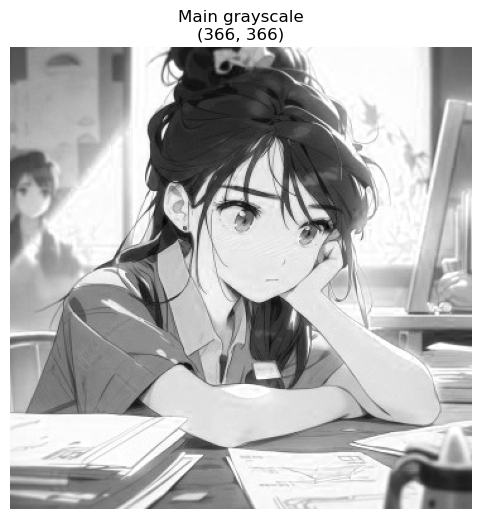

In [10]:
showImage(img_gr, "Main grayscale", figy=6)

In [11]:
def kernal(kernal, text="", v=(0,1)):
    showImage(kernal, text, v=v)
    return kernal

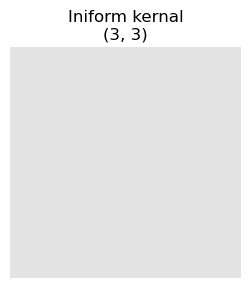

In [12]:
kernal1 = kernal([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]], "Iniform kernal")

In [13]:
def relu(arra: list):
    return [[0 if x  < 0 else x for x in y] for y in arra]

In [14]:
def expand2d(arra: list, dy, dx):
    arr = arra.copy()
    for i in range(dy): 
        arr.insert(0, [0]*len(arr[0]))
        arr.insert(len(arr), [0]*len(arr[0]))
    for y in range(len(arr)):
        row = [0]*dx
        row.extend(arr[y])
        row.extend([0]*dx)
        arr[y] = row
    return arr

def convolve2d(arra: list, kernal):
    dy = len(kernal)//2
    dx = len(kernal[0])//2
    arr = expand2d(arra, dy, dx)
    result = [[0 for x in y] for y in arr]
    for y in range(dy,len(arr)-dy):
        for x in range(dx, len(arr[0])-dx):
            a= []
            for p in range(len(kernal[1])):
                a.append(arr[y-dy+p][x-dx:x + dx + 1])
            s = 0
            for i in np.multiply(a, kernal):
                s += sum(i)
            result[y][x] = s
    return result

In [15]:
def pooling(arra: list, extent: int, stride: int):
    assert stride > 0
    arra = np.array(arra)
    result = []
    for y in range(0, len(arra), stride):
        row = []
        for x in range(0, len(arra[0]), stride):
            row.append(np.max(arra[y:y + extent, x:x + extent]))
        result.append(row)
    return result

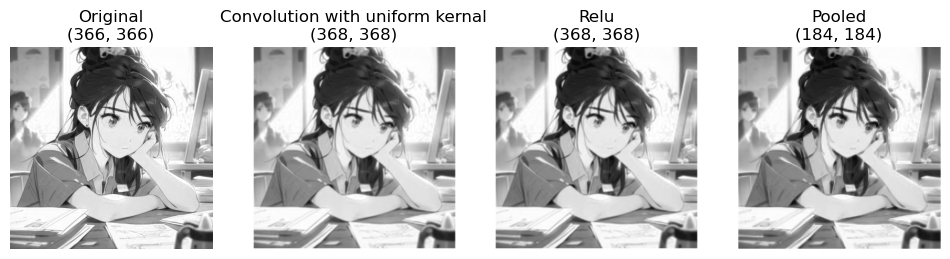

In [16]:
conv1 = convolve2d(arra=img_gr, kernal=kernal1)
relu_img = relu(conv1)
pooled = pooling(relu_img, extent=2, stride=2)
imgs = [img_gr, conv1, relu_img, pooled]
showImages(imgs, ["Original","Convolution with uniform kernal", "Relu", "Pooled"], 12)

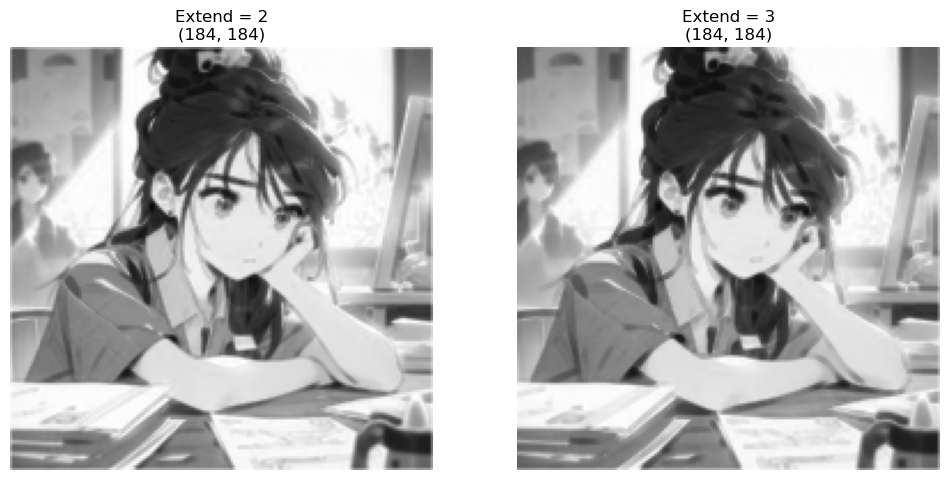

In [17]:
pooled2 = pooling(relu_img, extent=2, stride=2)
pooled3 = pooling(relu_img, extent=3, stride=2)
imgs = [pooled2, pooled3]
showImages(imgs, ["Extend = 2","Extend = 3"], 12)

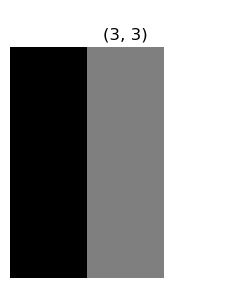

In [18]:
kernal2 =kernal([[1/3, 0, -1/3], [1/3,0,-1/3],[1/3,0,-1/3]], v=(-1/3,1/3))

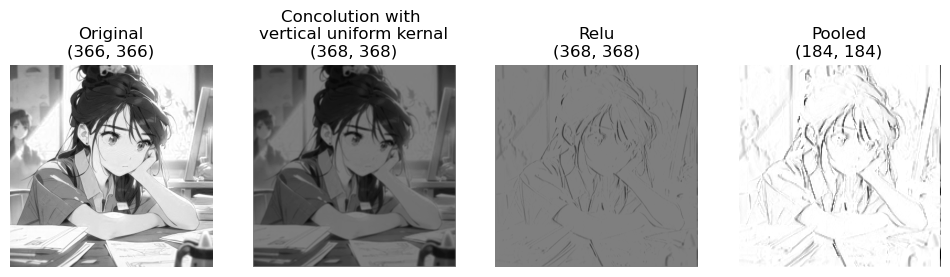

In [19]:
conv2 = convolve2d(arra=img_gr, kernal=kernal2)
relu_img = relu(conv2)
pooled = pooling(relu_img, extent=2, stride=2)
imgs = [img_gr, conv1, relu_img, pooled]
showImages(imgs, ["Original","Concolution with \nvertical uniform kernal", "Relu", "Pooled"], 12, vs=[(0,1), (-1,1), (-1,1)])

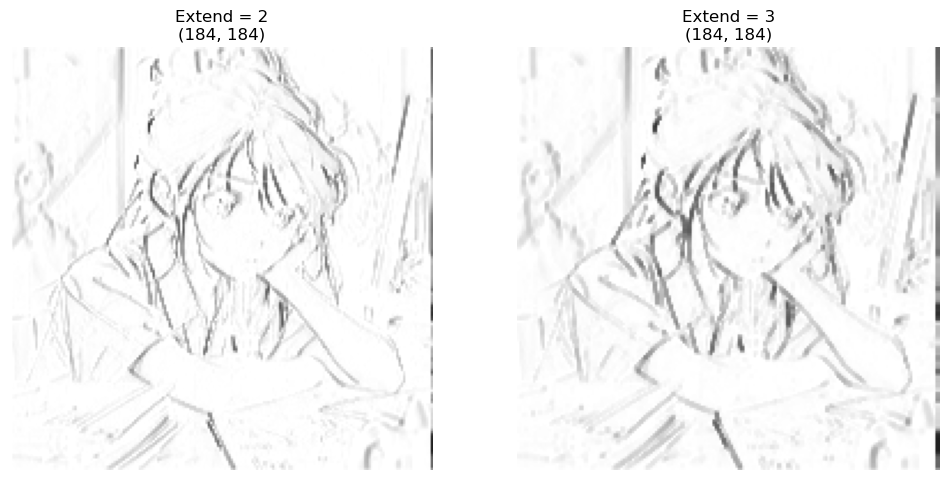

In [20]:
pooled2 = pooling(relu_img, extent=2, stride=2)
pooled3 = pooling(relu_img, extent=3, stride=2)
imgs = [pooled2, pooled3]
showImages(imgs, ["Extend = 2","Extend = 3"], 12)

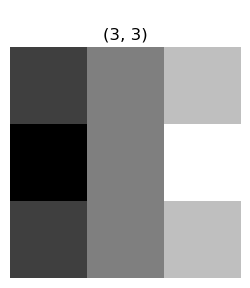

In [21]:
kernal21 = kernal([[1/4, 0, -1/4], [1/2,0,-1/2],[1/4,0,-1/4]], v=(-1/2,1/2))

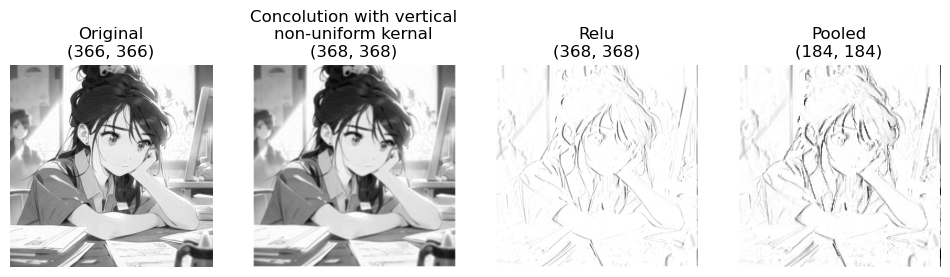

In [22]:
conv21 = convolve2d(arra=img_gr, kernal=kernal21)
relu_img = relu(conv21)
pooled = pooling(relu_img, extent=2, stride=2)
imgs = [img_gr, conv1, relu_img, pooled]
showImages(imgs, ["Original","Concolution with vertical\nnon-uniform kernal", "Relu", "Pooled"], 12, vs=None)

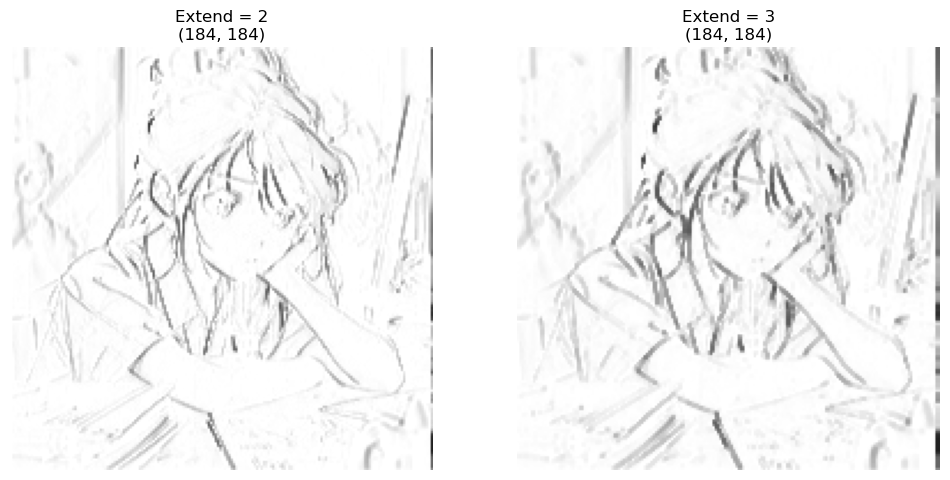

In [23]:
pooled2 = pooling(relu_img, extent=2, stride=2)
pooled3 = pooling(relu_img, extent=3, stride=2)
imgs = [pooled2, pooled3]
showImages(imgs, ["Extend = 2","Extend = 3"], 12)

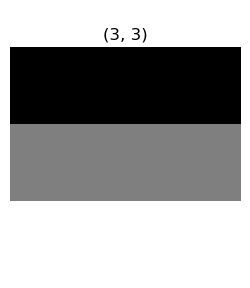

In [24]:
kernal3 = kernal([[1/3,1/3,1/3], [0,0,0], [-1/3,-1/3,-1/3]], v=None)

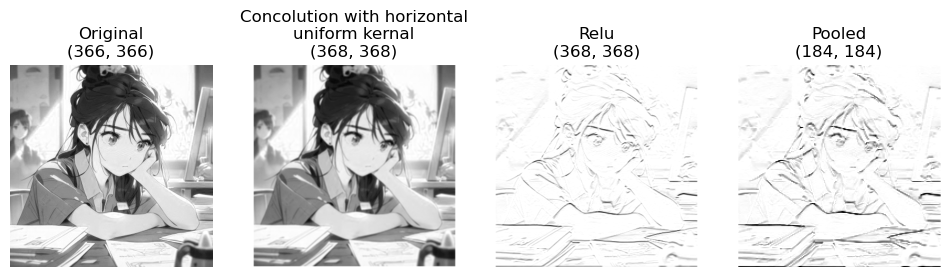

In [25]:
conv3=convolve2d(img_gr, kernal3)
relu_img = relu(conv3)
pooled = pooling(relu_img, extent=2, stride=2)
imgs = [img_gr, conv1, relu_img, pooled]
showImages(imgs, ["Original","Concolution with horizontal\nuniform kernal", "Relu", "Pooled"], 12, vs=None)

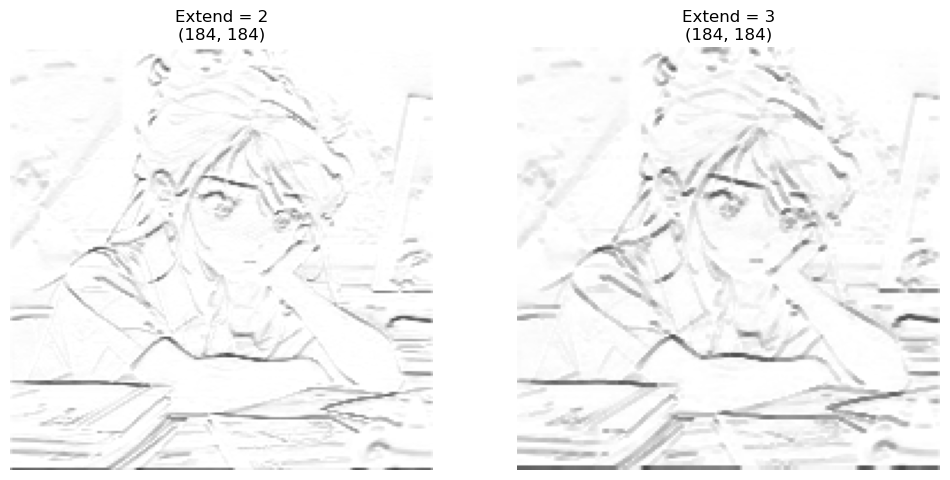

In [26]:
pooled2 = pooling(relu_img, extent=2, stride=2)
pooled3 = pooling(relu_img, extent=3, stride=2)
imgs = [pooled2, pooled3]
showImages(imgs, ["Extend = 2","Extend = 3"], 12)

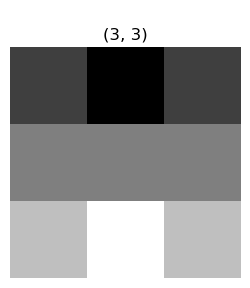

In [27]:
kernal31 = kernal([[1/4,1/2,1/4], [0,0,0], [-1/4,-1/2,-1/4]], v=None)

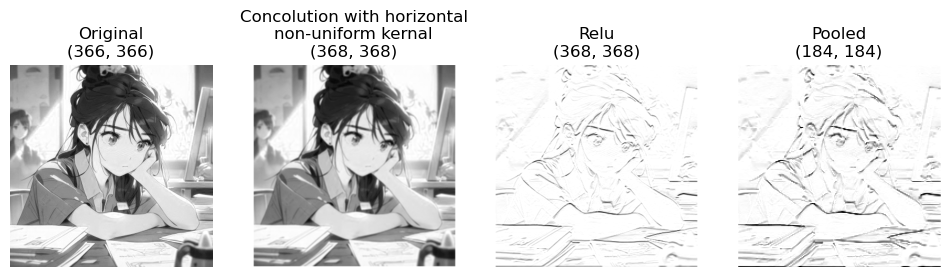

In [28]:
conv31=convolve2d(img_gr, kernal31)
relu_img = relu(conv31)
pooled = pooling(relu_img, extent=2, stride=2)
imgs = [img_gr, conv1, relu_img, pooled]
showImages(imgs, ["Original","Concolution with horizontal\nnon-uniform kernal", "Relu", "Pooled"], 12, vs=None)

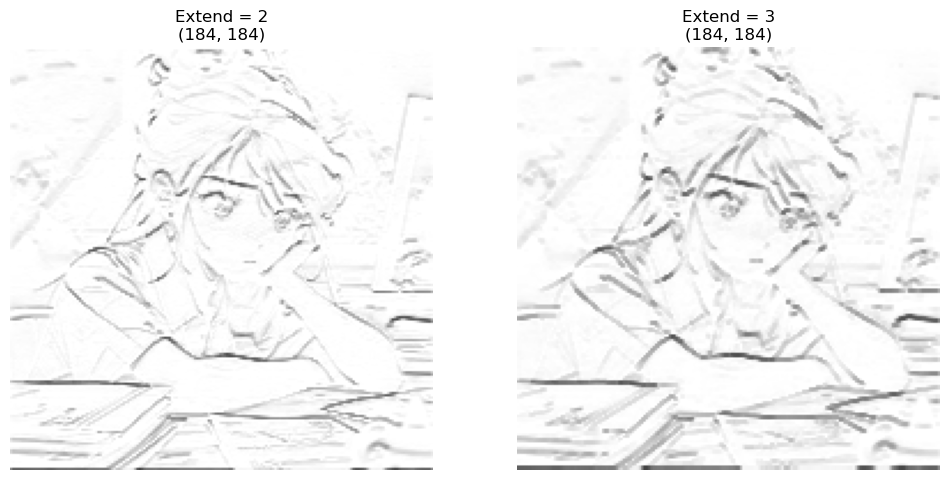

In [29]:
pooled2 = pooling(relu_img, extent=2, stride=2)
pooled3 = pooling(relu_img, extent=3, stride=2)
imgs = [pooled2, pooled3]
showImages(imgs, ["Extend = 2","Extend = 3"], 12)

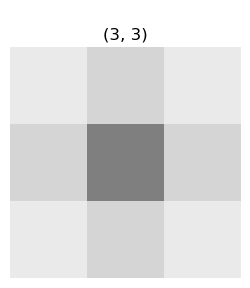

In [30]:
kernal4=kernal([[1/12,1/6,1/12],[1/6,1/2,1/6],[1/12,1/6,1/12]])

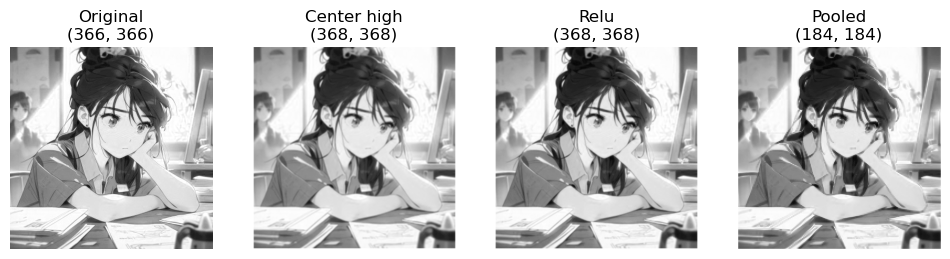

In [31]:
conv4=convolve2d(img_gr, kernal4)
relu_img = relu(conv4)
pooled = pooling(relu_img, extent=2, stride=2)
imgs = [img_gr, conv1, relu_img, pooled]
showImages(imgs, ["Original","Center high", "Relu", "Pooled"], 12)

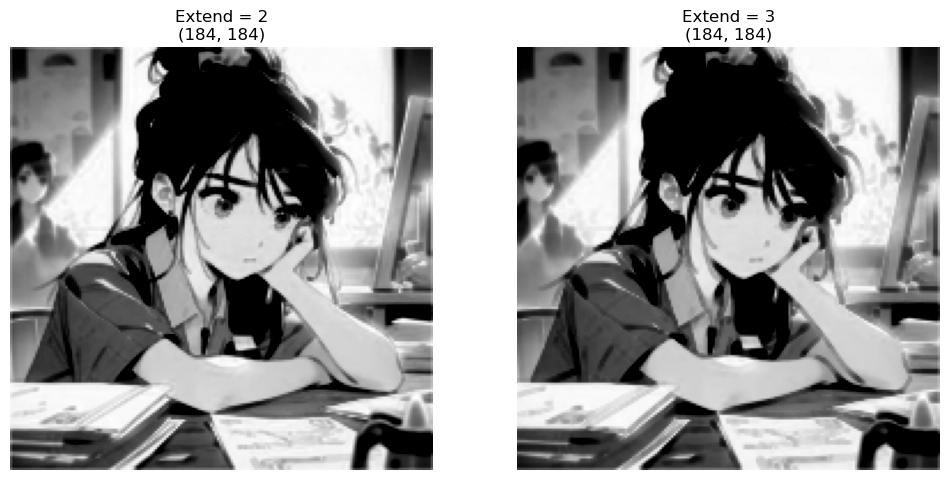

In [32]:
pooled2 = pooling(relu_img, extent=2, stride=2)
pooled3 = pooling(relu_img, extent=3, stride=2)
imgs = [pooled2, pooled3]
showImages(imgs, ["Extend = 2","Extend = 3"], 12)

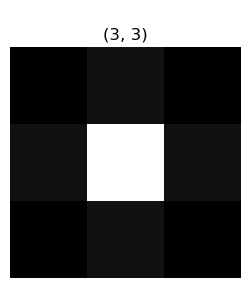

In [33]:
kernel5 = kernal([[1/6,1/12,1/6],[1/12,-1,1/12],[1/6,1/12,1/6]], v=None)

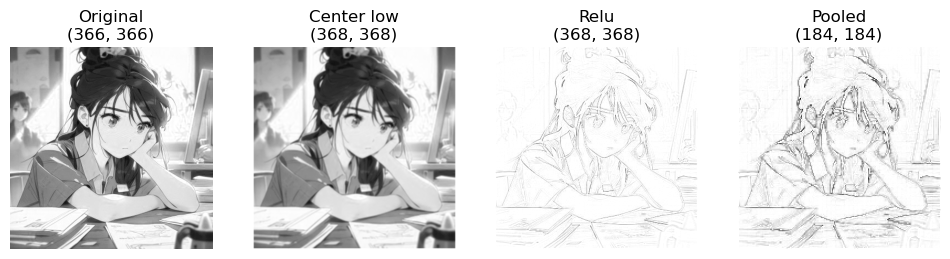

In [34]:
conv5 = convolve2d(img_gr, kernel5)
relu_img = relu(conv5)
pooled = pooling(relu_img, extent=2, stride=2)
imgs = [img_gr, conv1, relu_img, pooled]
showImages(imgs, ["Original","Center low", "Relu", "Pooled"], 12)

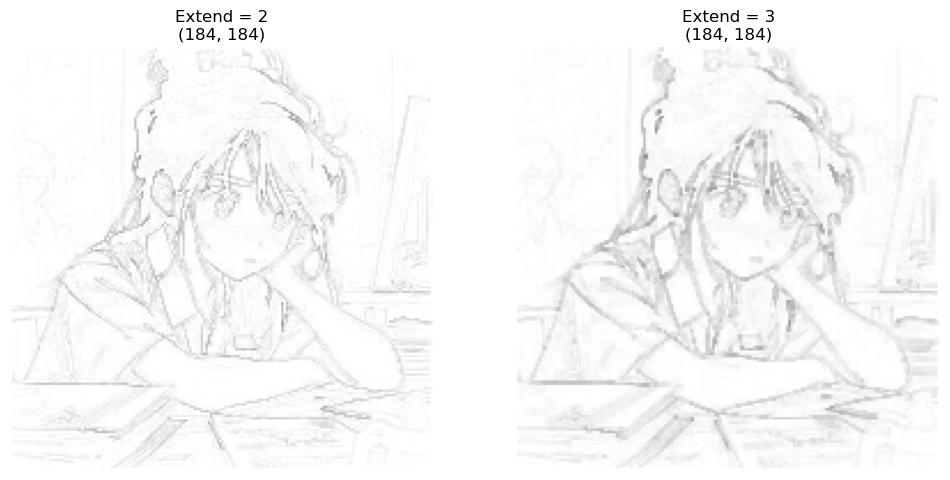

In [35]:
pooled2 = pooling(relu_img, extent=2, stride=2)
pooled3 = pooling(relu_img, extent=3, stride=2)
imgs = [pooled2, pooled3]
showImages(imgs, ["Extend = 2","Extend = 3"], 12)

In [36]:
def max_min_norm(arr: list):
    norm_arr = arr.copy()
    
    mx = -inf
    mn = inf
    for j in norm_arr:
        for i in j:
            mx = max(mx, i)
            mn = min(mn, i)
    
    for j in range(len(norm_arr)):
        for i in range(len(norm_arr[0])):
            norm_arr[j][i] = (norm_arr[j][i] - mn)/(mx - mn)
    
    return norm_arr

In [37]:
def max_median_norm(arr: list):
    norm_arr = arr.copy()
    
    mx = -inf
    md = 0
    for j in norm_arr:
        for i in j:
            mx = max(mx, i)
            md = md + i
    
    md = md/(len(arr)*len(arr[0]))
    for j in range(len(norm_arr)):
        for i in range(len(norm_arr[0])):
            norm_arr[j][i] = (norm_arr[j][i] - md)/(mx - md)
    
    return norm_arr

In [38]:
#         +y
#         |
#         |
# -y------o------- +x
#         |
#         |
#        -y
def kernalByFunc(func, dim=(5,5), centerdl=None, text="", norm_func=None):
    if not centerdl:
        centerdl = (dim[0]//2, dim[1]//2)
        
    kernal = []
    for j in range(dim[1]):
        row = []
        for i in range(dim[0]):
            x = i - centerdl[0]
            y = j - centerdl[1]
            v = func(x,y)
            row.append(v)
        kernal.append(row)
    
    if norm_func:
        kernal = norm_func(kernal)
    
    showImage(kernal, text, v=None)
    for r in kernal:
        for s in r:
            print(round(s,3), end="")
            print("\t", end="")
        print("")
        
    return kernal

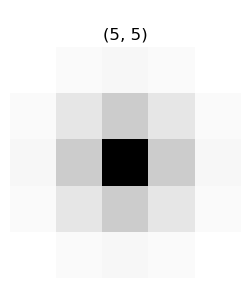

0.0	0.021	0.035	0.021	0.0	
0.021	0.098	0.202	0.098	0.021	
0.035	0.202	1.0	0.202	0.035	
0.021	0.098	0.202	0.098	0.021	
0.0	0.021	0.035	0.021	0.0	


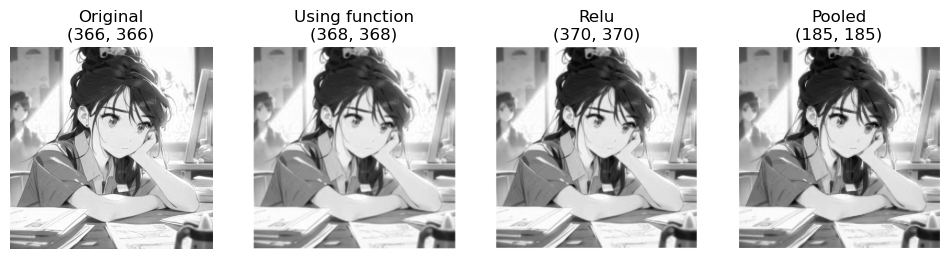

In [39]:
kernel6 = kernalByFunc(lambda x,y: -0.84499 + 0.5/(x*x + y*y + 0.3), norm_func=max_min_norm)

conv6 = convolve2d(img_gr, kernel6)
relu_img = relu(conv6)
pooled = pooling(relu_img, extent=2, stride=2)
imgs = [img_gr, conv1, relu_img, pooled]
showImages(imgs, ["Original","Using function", "Relu", "Pooled"], 12)

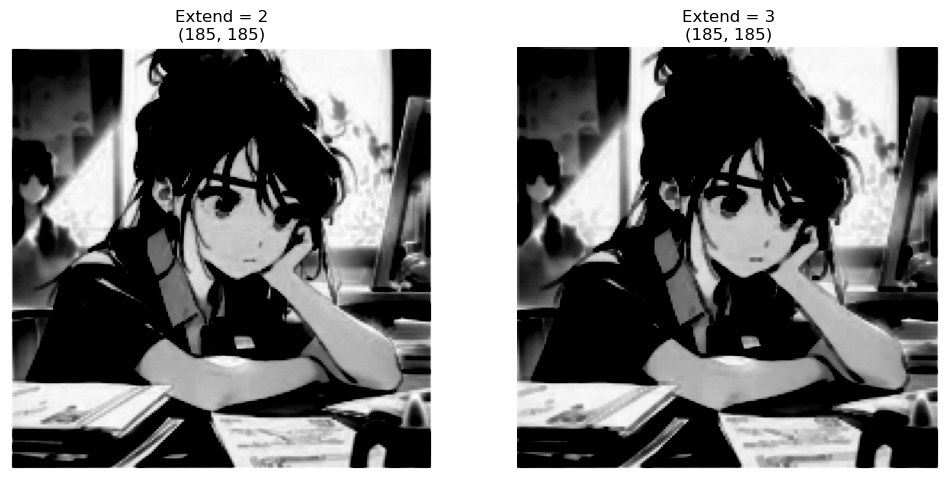

In [40]:
pooled2 = pooling(relu_img, extent=2, stride=2)
pooled3 = pooling(relu_img, extent=3, stride=2)
imgs = [pooled2, pooled3]
showImages(imgs, ["Extend = 2","Extend = 3"], 12)

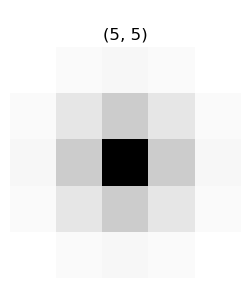

-0.112	-0.088	-0.073	-0.088	-0.112	
-0.088	-0.003	0.113	-0.003	-0.088	
-0.073	0.113	1.0	0.113	-0.073	
-0.088	-0.003	0.113	-0.003	-0.088	
-0.112	-0.088	-0.073	-0.088	-0.112	


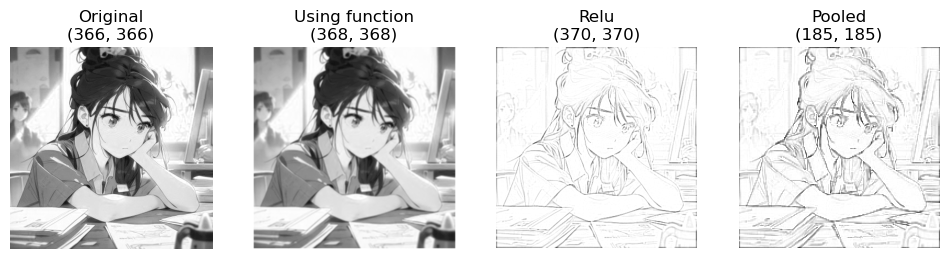

In [41]:
kernel6 = kernalByFunc(lambda x,y: -0.84499 + 0.5/(x*x + y*y + 0.3), norm_func=max_median_norm)

conv6 = convolve2d(img_gr, kernel6)
relu_img = relu(conv6)
pooled = pooling(relu_img, extent=2, stride=2)
imgs = [img_gr, conv1, relu_img, pooled]
showImages(imgs, ["Original","Using function", "Relu", "Pooled"], 12)

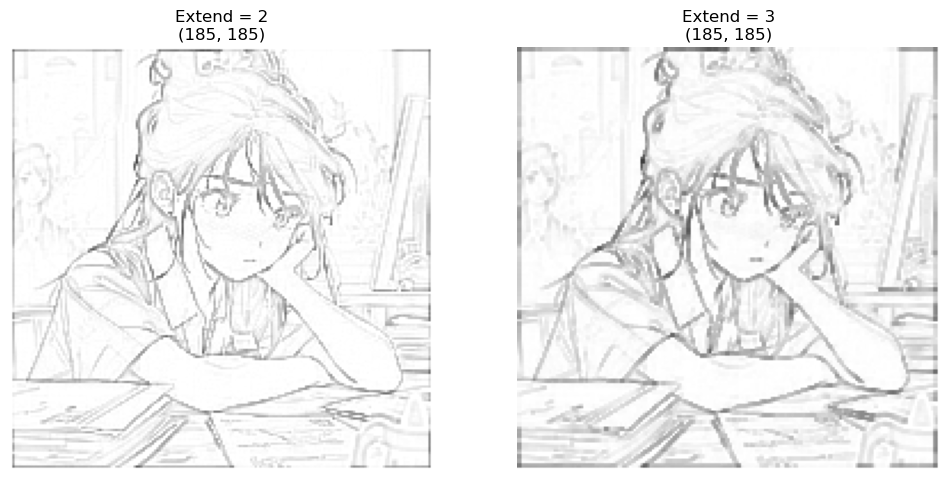

In [42]:
pooled2 = pooling(relu_img, extent=2, stride=2)
pooled3 = pooling(relu_img, extent=3, stride=2)
imgs = [pooled2, pooled3]
showImages(imgs, ["Extend = 2","Extend = 3"], 12)

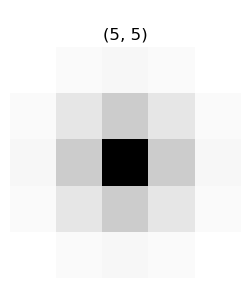

0.0	0.021	0.035	0.021	0.0	
0.021	0.098	0.202	0.098	0.021	
0.035	0.202	1.0	0.202	0.035	
0.021	0.098	0.202	0.098	0.021	
0.0	0.021	0.035	0.021	0.0	


In [68]:
kernel6 = kernalByFunc(lambda x,y: -0.84499 + 0.5/(x*x + y*y + 0.3), norm_func=max_median_norm)

In [64]:
print(kernel6)

[[-0.40075224769910095, -0.309398840240464, 1.0, -0.7715396073841571, -0.6279012608394956], [-0.309398840240464, -0.1583143586742566, 1.0, -1.151155237537905, -0.7715396073841571], [1.0, 1.0, 1.0, 1.0, 1.0], [-0.7715396073841571, -1.151155237537905, 1.0, -0.1583143586742566, -0.309398840240464], [-0.6279012608394956, -0.7715396073841571, 1.0, -0.309398840240464, -0.40075224769910095]]
